# Machine Learning Model for Geely Auto

## Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

## Objective:
To model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables.

In [269]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [270]:
import os
os.chdir("C:\Alohomora\AIML\IIIT")
#Importing dataset
car = pd.read_csv('CarPrice_Assignment.csv')
#Checking the datset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [271]:
# check for null values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [272]:
# Describe the dataset to check the types of values, range, outlier e.t.c
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data cleaning

In [273]:
#Change the values in CarName col to contain only Company names
car['CarName'] = car['CarName'].map(lambda x: x.split(' ')[0])
car_companies = car['CarName'].unique()
print(sorted(car_companies))

['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [274]:
# Car names contains some typos as seen above.
# Fixing those typos
typos_carName = {'maxda':'mazda', 'porcshce':'porsche','toyouta':'toyota',
                 'vokswagen':'volkswagen','vw':'volkswagen', 'nissan': 'Nissan'}
car['CarName'] = car['CarName'].map(lambda x: typos_carName[x] if x in typos_carName.keys() else x)
# Check the car names available after fixing the typos
car_companies = car['CarName'].unique()
print("Car Names: ")
print(sorted(car_companies))

# Convert the doornumber and cylindernumber into numerical values to make the analysis easy
dic_doornumber = {'two':2, 'four':4}
car['doornumber'] = car['doornumber'].map(lambda x: dic_doornumber[x] if x in dic_doornumber.keys() else x)

dic_cylindernumber = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
car['cylindernumber'] = car['cylindernumber'].map(lambda x: dic_cylindernumber[x] if x in dic_cylindernumber.keys() else x)

Car Names: 
['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


In [275]:
# Only 1 car has engine type as DOHCV, this seems like a typo.
# After some verification from the internet, I am sure there the engine type in mentioned car is dohc

#replacing dohcv by dohc
dic_enginetype = {'dohcv':'dohc'}
car['enginetype'] = car['enginetype'].map(lambda x: dic_enginetype[x] if x in dic_enginetype.keys() else x)

In [276]:
# Print all the column names
print("All Columns: ")
print(car.columns)

# Removing the car_ID column because it doesn't hold any significance
car = car.drop(['car_ID'], 1)

# Printing the unique values from some columns for observing
check_unique_values = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 'fuelsystem']
for col in check_unique_values:
    print("__"*20 + "Count of unique values for : "+col+"__"*20)
    print(car[col].value_counts())

All Columns: 
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
________________________________________Count of unique values for : symboling________________________________________
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
________________________________________Count of unique values for : CarName________________________________________
toyota         32
Nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab 

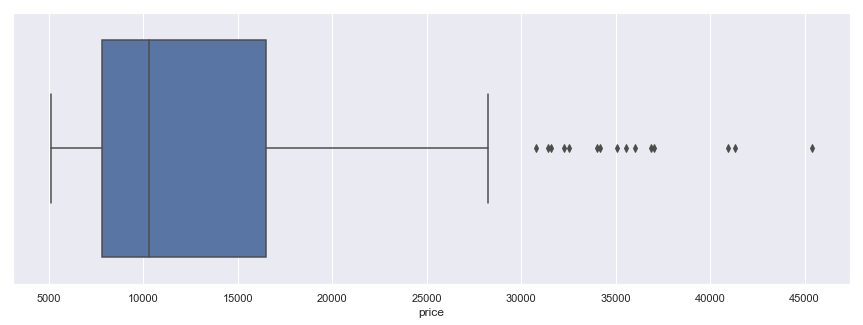

In [277]:
# check the distribution of car price
f,ax=plt.subplots(figsize=(15,5))
sns.boxplot(x='price', data=car, orient="h")

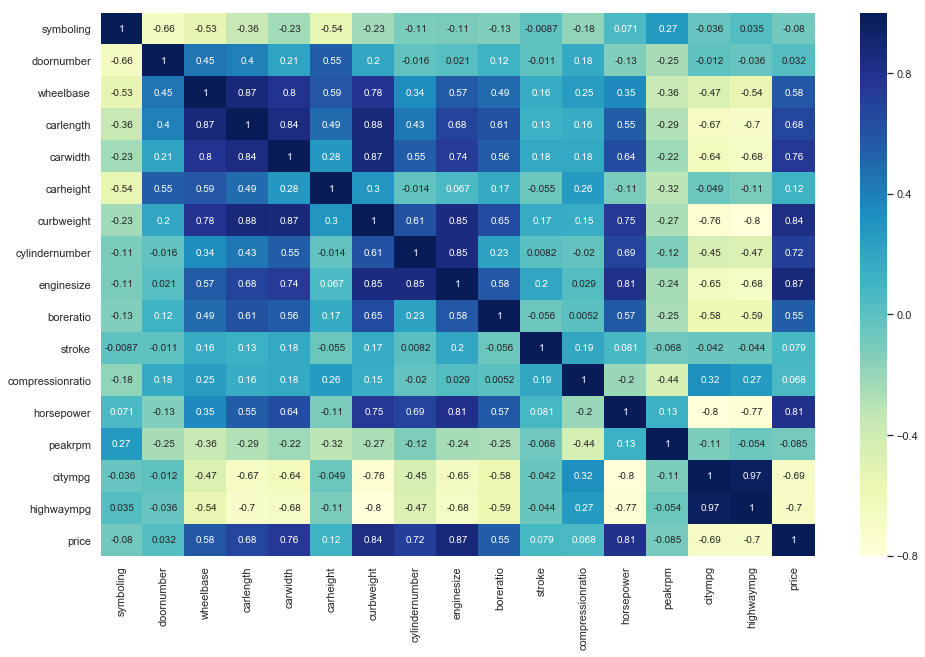

In [278]:
# Creating the correlation matrix
plt.figure(figsize = (16,10))
sns.heatmap(car.corr(),annot = True, cmap="YlGnBu")

In [279]:
# Removing some highly correlated values

# Replacing City mileage and highway mileage with a single column Mileage
car['mileage'] = (car['citympg'] + car['highwaympg'])/2
car = car.drop(['highwaympg','citympg'], 1)

# Car Length and Width have high correlation with car weight.
# so dropping car length and width

# Wheelbase is directly correlated to length and hence weight.
# so dropping wheelbase too

# Engine size is directly correlated to curbweight and amongst these two, curbweight has more correlation with price.
# so dropping engine size.

car = car.drop(['carlength','carwidth', 'wheelbase', 'enginesize'], 1)

In [280]:
# Check the remaining columns after removing the correlated columns
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'mileage'],
      dtype='object')

In [281]:
# One-hot encoding
car = pd.get_dummies(car, columns=['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], drop_first=True)
# check the new columns names created

print(car.columns)

Index(['symboling', 'doornumber', 'carheight', 'curbweight', 'cylindernumber',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'price', 'mileage', 'CarName_alfa-romero', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_m

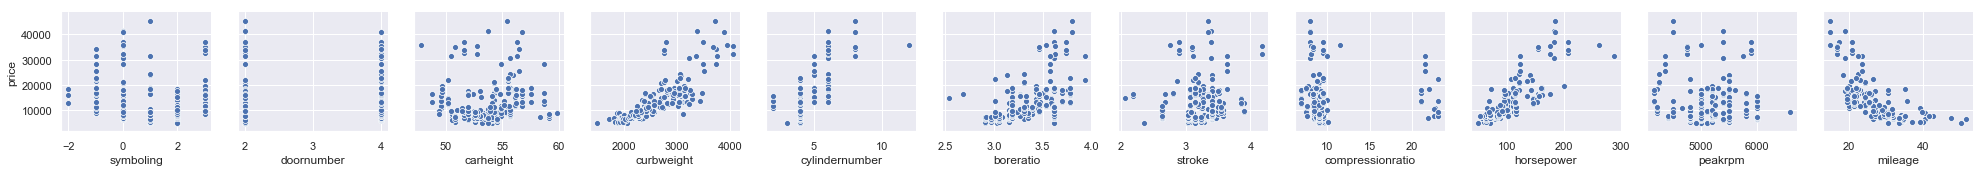

In [282]:
sns.pairplot(data=car, y_vars=['price'], x_vars=['symboling', 'doornumber', 'carheight', 'curbweight', 'cylindernumber',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'mileage'])

# Bulding the Model...

In [283]:
# Putting the dependent variable in Y
y = car['price']

# Putting the independent variables in X
x = car.drop('price', 1)  # all the variable except price

In [284]:
# Check x
x.head()

,symboling,doornumber,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,48.8,2548,4,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,2,48.8,2548,4,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,2,52.4,2823,6,2.68,3.47,9.0,154,5000,...,0,1,0,0,0,0,0,1,0,0
3,2,4,54.3,2337,4,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,4,54.3,2824,5,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


## Normalize the values

In [285]:
# Normalisation function defination
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# Applying normalize() to all columns in x 
x = x.apply(normalize)

## Splitting the data into training and testing sets

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [287]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [288]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False  True  True False False  True False  True  True False
  True  True  True False False False False  True False False False  True
 False  True False False False False False False  True False  True  True
  True  True False False  True  True False False False  True False False
  True False False False False]
[30 27  7  1  1 24 17  1 23  1  1 12  1  1  1 16 10 26 29  1 21 32  8  1
  9  1 11  3  5 22 20  2  1 19  1  1  1  1 14 15  1  1 13  4 31  1 18  6
  1 33 28 25 34]


In [289]:
# Check the columns selected
col = x_train.columns[rfe.support_]
print(col)

Index(['curbweight', 'cylindernumber', 'compressionratio', 'peakrpm',
       'mileage', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_l',
       'enginetype_rotor', 'fuelsystem_idi'],
      dtype='object')


In [290]:
x_train_rfe = x_train[col]

In [291]:
# add a constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [292]:
# execute the LR model on training data
lm = sm.OLS(y_train,x_train_rfe).fit()

In [293]:
# check the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     95.56
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.25e-64
Time:                        22:33:12   Log-Likelihood:                -1286.9
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     123   BIC:                             2673.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1854.6581   2

In [294]:
# create a new dataset for calculating vif values
car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [295]:
# Calculating Vif value
vif_cal(input_data=car_vif, dependent_col="price")

,Var,Vif
11,fueltype_gas,128.44
19,fuelsystem_idi,94.00
2,compressionratio,66.59
9,CarName_peugeot,10.68
0,curbweight,10.60
14,carbody_sedan,10.43
17,enginetype_l,9.94
13,carbody_hatchback,9.73
4,mileage,8.20
15,carbody_wagon,5.41


In [296]:
# Removing some columns which are correlated or are less significant. 

#Removing the column: fueltype_gas

car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train
car_vif = car_vif.drop(['fueltype_gas'], 1)

# execute the LR model on training data
x_train_rfe = x_train_rfe.drop(['fueltype_gas'], 1)
lm2 = sm.OLS(y_train,x_train_rfe).fit()

# Print the summary to check the new values
print(lm2.summary())

# Print new Vif values
vif_cal(input_data=car_vif, dependent_col="price")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     95.56
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.25e-64
Time:                        22:33:12   Log-Likelihood:                -1286.9
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     123   BIC:                             2673.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 273.7763   2

,Var,Vif
2,compressionratio,109.96
18,fuelsystem_idi,74.19
0,curbweight,24.73
1,cylindernumber,20.54
4,mileage,19.38
13,carbody_sedan,16.85
12,carbody_hatchback,12.46
9,CarName_peugeot,11.14
16,enginetype_l,10.27
3,peakrpm,8.05


In [297]:
#Removing the column: compressionratio

car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train
car_vif = car_vif.drop(['compressionratio'], 1)

# execute the LR model on training data
x_train_rfe = x_train_rfe.drop(['compressionratio'], 1)
lm3 = sm.OLS(y_train,x_train_rfe).fit()

# Print the summary to check the new values
print(lm3.summary())

# Print new Vif values
vif_cal(input_data=car_vif, dependent_col="price")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.55e-65
Time:                        22:33:13   Log-Likelihood:                -1287.3
No. Observations:                 143   AIC:                             2613.
Df Residuals:                     124   BIC:                             2669.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 249.3477   2

,Var,Vif
10,fueltype_gas,128.42
18,fuelsystem_idi,21.28
8,CarName_peugeot,10.65
0,curbweight,10.60
13,carbody_sedan,10.42
16,enginetype_l,9.93
12,carbody_hatchback,9.62
3,mileage,7.13
14,carbody_wagon,5.41
1,cylindernumber,3.02


In [298]:
#Removing the column: compressionratio

car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train
car_vif = car_vif.drop(['mileage'], 1)

# execute the LR model on training data
x_train_rfe = x_train_rfe.drop(['mileage'], 1)
lm4 = sm.OLS(y_train,x_train_rfe).fit()

# Print the summary to check the new values
print(lm4.summary())

# Print new Vif values
vif_cal(input_data=car_vif, dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.99e-66
Time:                        22:33:13   Log-Likelihood:                -1288.2
No. Observations:                 143   AIC:                             2612.
Df Residuals:                     125   BIC:                             2666.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2208.1200   1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Var,Vif
18,fuelsystem_idi,93.78
10,fueltype_gas,63.67
2,compressionratio,57.86
8,CarName_peugeot,10.24
13,carbody_sedan,10.21
12,carbody_hatchback,9.47
16,enginetype_l,9.04
14,carbody_wagon,5.28
0,curbweight,4.28
1,cylindernumber,3.83


In [299]:
#Removing the column: compressionratio

car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train
car_vif = car_vif.drop(['fuelsystem_idi'], 1)

# execute the LR model on training data
x_train_rfe = x_train_rfe.drop(['fuelsystem_idi'], 1)
lm5 = sm.OLS(y_train,x_train_rfe).fit()

# Print the summary to check the new values
print(lm5.summary())

# Print new Vif values
vif_cal(input_data=car_vif, dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.95e-66
Time:                        22:33:13   Log-Likelihood:                -1290.2
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     126   BIC:                             2665.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2409.9064   1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Var,Vif
11,fueltype_gas,101.37
0,curbweight,43.73
4,mileage,39.00
2,compressionratio,24.89
14,carbody_sedan,19.31
1,cylindernumber,17.14
13,carbody_hatchback,13.94
9,CarName_peugeot,11.12
17,enginetype_l,10.56
3,peakrpm,9.08


In [300]:
#Removing the column: carbody_hardtop

car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train
car_vif = car_vif.drop(['carbody_hardtop'], 1)

# execute the LR model on training data
x_train_rfe = x_train_rfe.drop(['carbody_hardtop'], 1)
lm6 = sm.OLS(y_train,x_train_rfe).fit()

# Print the summary to check the new values
print(lm6.summary())

# Print new Vif values
vif_cal(input_data=car_vif, dependent_col="price")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.63e-66
Time:                        22:33:13   Log-Likelihood:                -1291.7
No. Observations:                 143   AIC:                             2615.
Df Residuals:                     127   BIC:                             2663.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1271.3872   1

,Var,Vif
11,fueltype_gas,121.38
18,fuelsystem_idi,93.96
2,compressionratio,66.30
9,CarName_peugeot,10.67
0,curbweight,10.51
16,enginetype_l,9.92
4,mileage,8.14
13,carbody_sedan,7.03
12,carbody_hatchback,6.70
1,cylindernumber,3.83


In [301]:
#Removing the column: carbody_sedan

car_vif = x_train
car_vif = car_vif[col]
car_vif['price'] = y_train
car_vif = car_vif.drop(['carbody_sedan'], 1)

# execute the LR model on training data
x_train_rfe = x_train_rfe.drop(['carbody_sedan'], 1)
lm7 = sm.OLS(y_train,x_train_rfe).fit()

# Print the summary to check the new values
print(lm7.summary())

# Print new Vif values
vif_cal(input_data=car_vif, dependent_col="price")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.38e-67
Time:                        22:33:13   Log-Likelihood:                -1293.4
No. Observations:                 143   AIC:                             2617.
Df Residuals:                     128   BIC:                             2661.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -246.0495    

,Var,Vif
11,fueltype_gas,108.83
18,fuelsystem_idi,91.28
2,compressionratio,66.56
9,CarName_peugeot,10.66
0,curbweight,10.48
16,enginetype_l,9.91
4,mileage,8.03
1,cylindernumber,3.86
17,enginetype_rotor,2.31
15,enginelocation_rear,2.10


## Making predictions

In [302]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
x_test_rfe = x_test[col]
x_test_rfe = x_test_rfe.drop(['fueltype_gas', 'compressionratio', 'mileage', 'fuelsystem_idi', 'carbody_hardtop','carbody_sedan'], 1)

# Adding a constant variable 
x_test_rfe = sm.add_constant(x_test_rfe)

# Making predictions
y_pred = lm7.predict(x_test_rfe)

Text(0,0.5,'Car Price')

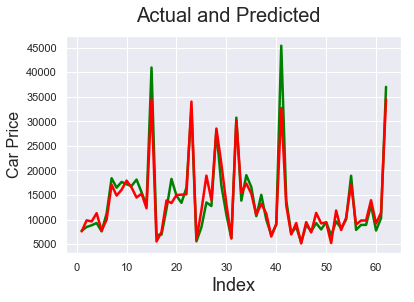

In [303]:
# Actual and Predicted
c = [i for i in range(1,63,1)] # generating index
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'ytest-ypred')

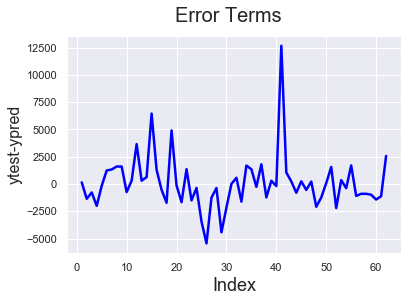

In [304]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

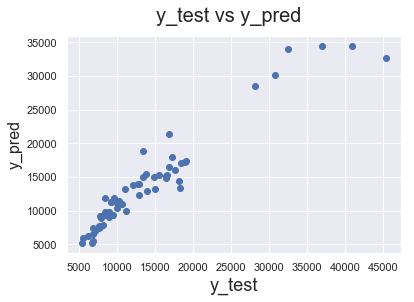

In [305]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Index')

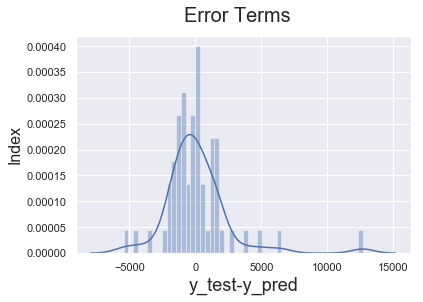

In [306]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [307]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 2476.496755363338
